## <center>__Find Optimum Temperature Range__<center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fitter import Fitter, get_common_distributions
import scipy
from scipy import stats

In [2]:
#data ETL
data_path = "../dataset/data_suhu.xlsx"

In [3]:
df = pd.read_excel(data_path)
df.head(10)

,Hari,Tanggal,Jam,ruang1_Suhu,ruang1_Kelembapan,ruang2_Suhu,ruang2_Kelembapan,ruang3_Suhu,ruang3_Kelembapan,ruang4_Suhu,ruang4_Kelembapan,ruang5_Suhu,ruang5_Kelembapan,ruang6_Suhu,ruang6_Kelembapan,Kec.Angin (Km/h),Lattitude,Longitude,Sudut Orientasi
0,Sabtu,2022-09-17,11:55,31.6,66.3,32.4,63.1,31.4,65.7,31.9,65.0,32.2,62.3,31.4,65.9,2.4,5.51683,95.27200,176
1,Sabtu,2022-09-17,11:55,31.6,66.3,32.4,63.1,31.4,65.6,31.9,64.9,32.2,62.3,31.4,64.8,0.0,5.51683,95.27199,176
2,Sabtu,2022-09-17,11:55,31.6,66.3,32.4,63.0,31.4,65.6,31.9,64.8,32.2,62.3,31.4,64.7,0.0,5.51683,95.27199,176
3,Sabtu,2022-09-17,11:55,31.6,66.3,32.4,62.9,31.4,65.6,31.9,64.9,32.2,62.3,31.4,64.3,0.0,5.51683,95.27199,176
4,Sabtu,2022-09-17,11:55,31.6,66.3,32.4,62.9,31.4,65.5,31.9,65.0,32.2,62.3,31.4,64.3,0.0,5.51683,95.27199,176
5,Sabtu,2022-09-17,11:56,31.6,66.3,32.4,62.8,31.4,65.5,31.9,65.1,32.2,62.3,31.4,64.4,0.0,5.51683,95.27199,176
6,Sabtu,2022-09-17,11:56,31.6,66.3,32.4,62.8,31.4,65.6,31.9,65.2,32.2,62.3,31.4,64.4,0.0,5.51683,95.27199,176
7,Sabtu,2022-09-17,11:56,31.6,66.3,32.4,62.8,31.4,65.6,31.9,65.2,32.2,62.3,31.4,64.4,0.0,5.51683,95.27199,176
8,Sabtu,2022-09-17,11:56,31.6,66.3,32.4,62.7,31.4,65.5,31.9,65.3,32.2,62.3,31.4,64.3,0.0,5.51683,95.27199,176
9,Sabtu,2022-09-17,11:56,31.6,66.3,32.4,62.8,31.4,65.4,31.9,65.4,32.2,62.3,31.4,64.2,0.0,5.51683,95.27200,176


In [4]:
#buang data yang tidak perlu
df = df.drop(["Hari", "Tanggal", " Jam", " ruang1_Kelembapan", " ruang2_Kelembapan", " ruang3_Kelembapan", " ruang4_Kelembapan", \
              " ruang5_Kelembapan", " ruang6_Kelembapan", "Kec.Angin (Km/h)", " Lattitude", " Longitude", " Sudut Orientasi"], axis=1)
df.head(10)

,ruang1_Suhu,ruang2_Suhu,ruang3_Suhu,ruang4_Suhu,ruang5_Suhu,ruang6_Suhu
0,31.6,32.4,31.4,31.9,32.2,31.4
1,31.6,32.4,31.4,31.9,32.2,31.4
2,31.6,32.4,31.4,31.9,32.2,31.4
3,31.6,32.4,31.4,31.9,32.2,31.4
4,31.6,32.4,31.4,31.9,32.2,31.4
5,31.6,32.4,31.4,31.9,32.2,31.4
6,31.6,32.4,31.4,31.9,32.2,31.4
7,31.6,32.4,31.4,31.9,32.2,31.4
8,31.6,32.4,31.4,31.9,32.2,31.4
9,31.6,32.4,31.4,31.9,32.2,31.4


In [5]:
#check nilai 0
(df == 0).any()

 ruang1_Suhu     True
 ruang2_Suhu     True
 ruang3_Suhu    False
 ruang4_Suhu    False
 ruang5_Suhu    False
 ruang6_Suhu     True
dtype: bool

In [16]:
#save Clean data
df.to_excel('../dataset/clean_data.xlsx', index=False)

## <center> Data Cleaning <center>

In [6]:
#check Nan & 0 value and relace it with avg depent on column
mean_df = df.mean()
df_clean = df.replace(0, mean_df)

In [7]:
(df_clean==0).any()

 ruang1_Suhu    False
 ruang2_Suhu    False
 ruang3_Suhu    False
 ruang4_Suhu    False
 ruang5_Suhu    False
 ruang6_Suhu    False
dtype: bool

## <center> Statistik Deskriptif <center>

In [8]:
df_clean.describe()

,ruang1_Suhu,ruang2_Suhu,ruang3_Suhu,ruang4_Suhu,ruang5_Suhu,ruang6_Suhu
count,138415.000000,138415.000000,138415.000000,138415.000000,138415.000000,138415.000000
mean,29.155022,29.323698,29.609305,28.831099,29.509440,29.480415
std,2.087880,2.318050,2.075433,2.082562,2.525728,2.111761
min,24.900000,24.100000,25.200000,24.000000,24.000000,25.100000
25%,27.500000,27.500000,28.000000,27.200000,27.400000,27.900000
50%,28.900000,29.000000,29.500000,28.700000,29.200000,29.200000
75%,30.700000,31.000000,31.100000,30.400000,31.900000,31.000000
max,38.500000,38.900000,40.600000,36.200000,35.500000,38.400000


## <center>Visualisiasi Data<center>

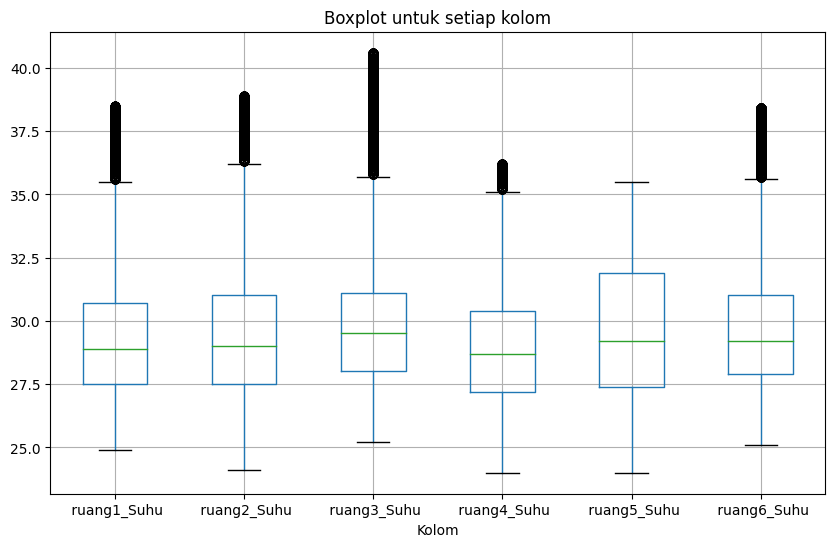

In [9]:
# buat boxplot untuk setiap ruangan
fig, ax = plt.subplots(figsize=(10,6))

df_clean.boxplot(ax=ax)
ax.set_title('Boxplot untuk setiap kolom')
ax.set_xlabel('Kolom')

# tampilkan figure
plt.show()

Fitting 4 distributions: 100%|██████████| 4/4 [00:18<00:00,  4.57s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.263467,723.738786,-1.823132e+06,0.161793,0.042957,2.189516e-222
gamma,0.263468,721.739955,-1.823144e+06,0.161793,0.042958,2.164729e-222
lognorm,0.266229,720.392315,-1.821701e+06,0.161680,0.043095,8.339150e-224
norm,0.277561,837.142347,-1.815943e+06,0.162133,0.058125,0.000000e+00


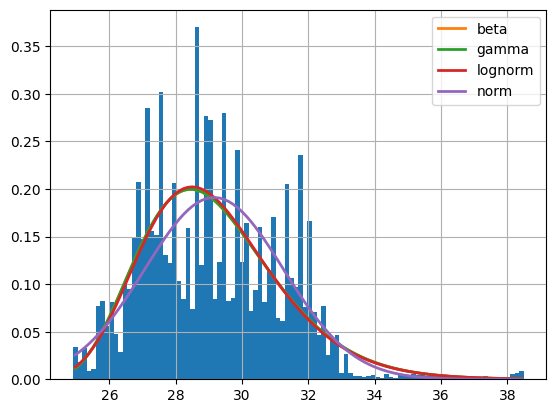

In [10]:
#find best data destribution

data = df_clean[' ruang1_Suhu']
label = ' ruang1_Suhu'

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "norm"])

f.fit()
f.summary()

In [11]:
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 8.745030764293332,
  'b': 28628963.06177271,
  'loc': 22.945865739515497,
  'scale': 20327172.788758647}}

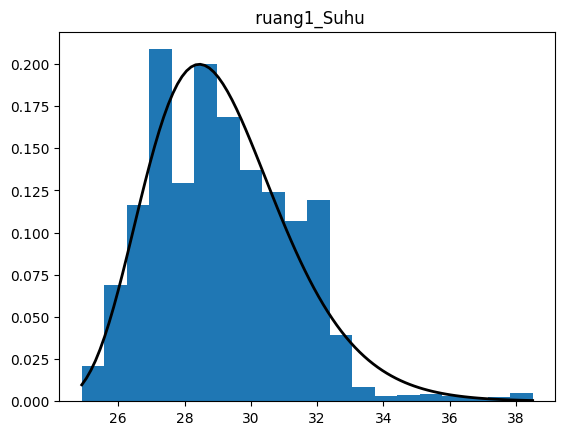

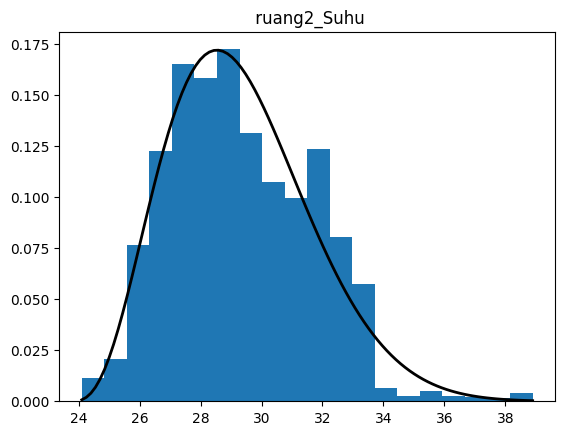

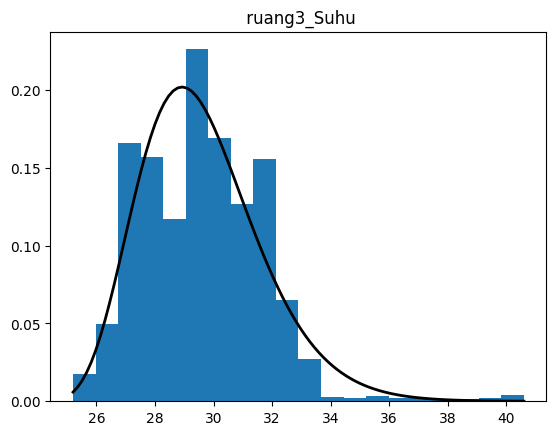

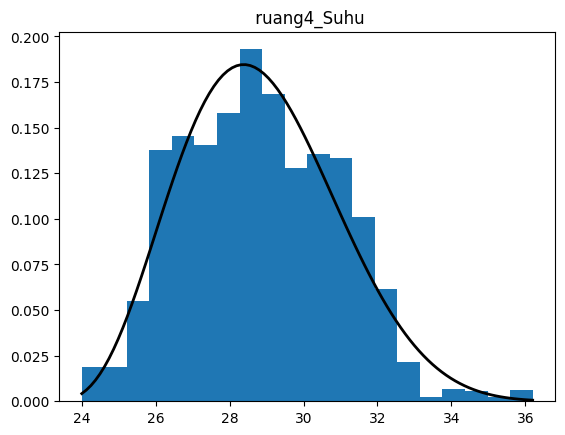

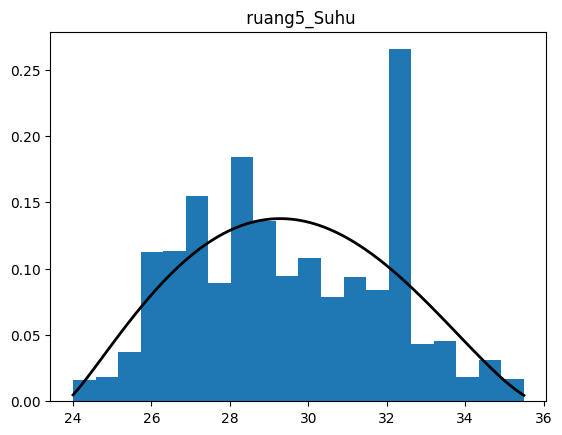

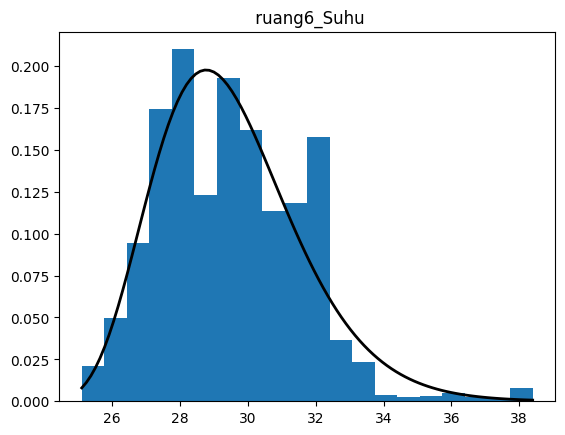

In [12]:
#histogram and distribution

def hist_and_dist(data, column_name):
      a, b, loc, scale = stats.beta.fit(data)
      x = np.linspace(min(data), max(data), 100)
      pdf = stats.beta.pdf(x, a, b, loc, scale)
      plt.plot(x, pdf, 'k', linewidth=2)
      plt.hist(data, bins=20, density=True)
      plt.title(column_name)
      plt.show()
      
for column in df_clean.columns:
      hist_and_dist(df_clean[column], column)

In [113]:
#check skewwness
skewness = df_clean.skew()
print("Tingkat Skewwness Dataset ..\n")
print(skewness)

Tingkat Skewwness Dataset ..

 ruang1_Suhu    0.630594
 ruang2_Suhu    0.502021
 ruang3_Suhu    0.872718
 ruang4_Suhu    0.285921
 ruang5_Suhu    0.107461
 ruang6_Suhu    0.643962
dtype: float64


## <center> Optimum Range <center>

In [168]:
'''
Anything above Q3   +   1.5   x   IQR is an outlier
Anything below Q1   -   1.5   x   IQR is an outlier
'''

#Optimum range dengan Quartile

Q1 = df_clean.quantile(0.25)
Q3 = df_clean.quantile(0.75)

# mencari range data yang optimum
lower_range = Q1 
upper_range = Q3

# menampilkan range data yang optimum
print("Range data optimum untuk setiap Ruangan:")

for i, columns in enumerate(df_clean.columns):
      print(f'Range optimum {columns} ({lower_range[i]} - {upper_range[i]})')

Range data optimum untuk setiap Ruangan:
Range optimum  ruang1_Suhu (27.5 - 30.7)
Range optimum  ruang2_Suhu (27.5 - 31.0)
Range optimum  ruang3_Suhu (28.0 - 31.1)
Range optimum  ruang4_Suhu (27.2 - 30.4)
Range optimum  ruang5_Suhu (27.4 - 31.9)
Range optimum  ruang6_Suhu (27.9 - 31.0)


In [167]:
#Optimum range dengan pendekatan mean dan standar deviasi
#optimum_range = [mean - factor * standar_deviasi] sampai [mean + factor * standar_deviasi]

def find_optimum_range_STAT(data, colum_name):
      mean = data.mean()
      std_dev = data.std()
      optimum_range = [mean - 1 * std_dev, mean + 1 * std_dev]
      print(f'Range optimum {colum_name} ({optimum_range[0]} - {optimum_range[1]})')

print("Range data optimum untuk setiap Ruangan:")
for column in df_clean.columns.values:
      find_optimum_range_STAT(df_clean[column], column)
      

Range data optimum untuk setiap Ruangan:
Range optimum  ruang1_Suhu (27.067141971602858 - 31.242901249008234)
Range optimum  ruang2_Suhu (27.005648321430005 - 31.6417486151248)
Range optimum  ruang3_Suhu (27.53387258139457 - 31.68473811831283)
Range optimum  ruang4_Suhu (26.748536606971438 - 30.913660409247907)
Range optimum  ruang5_Suhu (26.983712541170867 - 32.03516836046551)
Range optimum  ruang6_Suhu (27.368654687439225 - 31.592175861306067)


In [160]:
#Optimum range dengan pendekatan Machine learning K-Means Clustering

from sklearn.cluster import KMeans
from loguru import logger as log

def find_optimum_range_KMEANs(data, column_name, vis_type):
      
      
      if vis_type == 'scatter':
            data = np.array(sorted(data.values))
            data = data.reshape(-1, 1)
            kmeans = KMeans(n_clusters=3)
            kmeans.fit(data)
            labels = kmeans.predict(data)
            centers = kmeans.cluster_centers_
            plt.scatter(data, np.zeros_like(data), c=labels)
            plt.scatter(centers, np.zeros_like(centers), c='red', marker='x', s=200)
            plt.title(column_name)
            plt.xlabel("Suhu")
            plt.show()
            
      elif vis_type == 'histogram':
            data = np.array(sorted(data.values))
            data = data.reshape(-1, 1)
            kmeans = KMeans(n_clusters=3)
            kmeans.fit(data)
            labels = kmeans.predict(data)
            centers = kmeans.cluster_centers_
            bin_edges = np.histogram_bin_edges(data, bins=100)
            for i in range(kmeans.n_clusters):
                  plt.hist(data[labels==i], bins=bin_edges, alpha=0.5, edgecolor='black', linewidth=1.2, label=f'Cluster {i+1}')
            plt.legend()
            plt.title(column_name)
            plt.xlabel("Suhu")
            plt.show()
            
      else:
            log.warning("Tipe Visualisasi Tidak Ada!!")

c:\Users\User\anaconda3\envs\DS\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


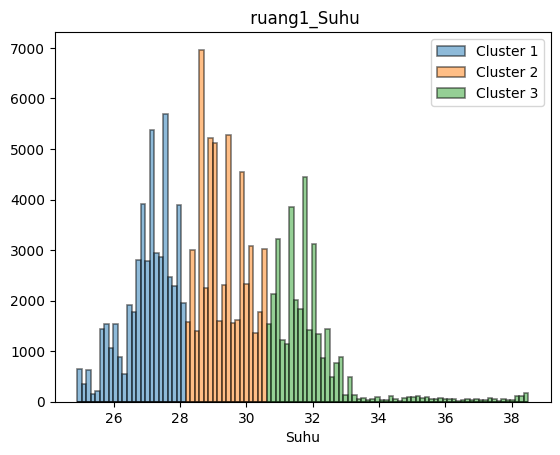

c:\Users\User\anaconda3\envs\DS\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


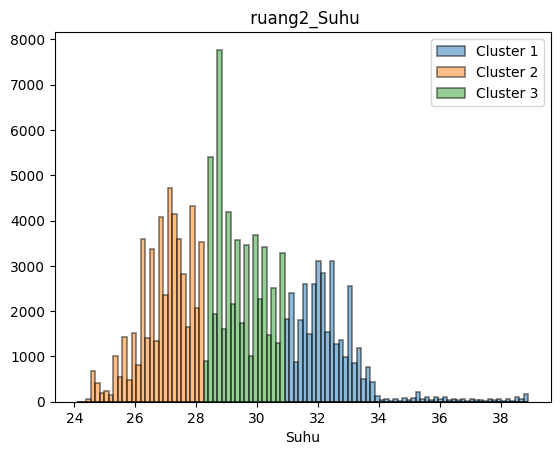

c:\Users\User\anaconda3\envs\DS\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


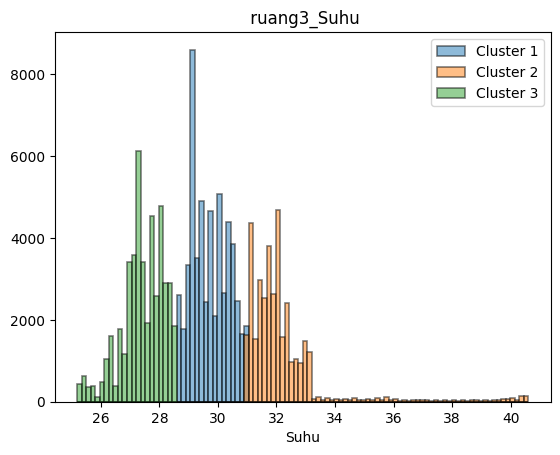

c:\Users\User\anaconda3\envs\DS\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


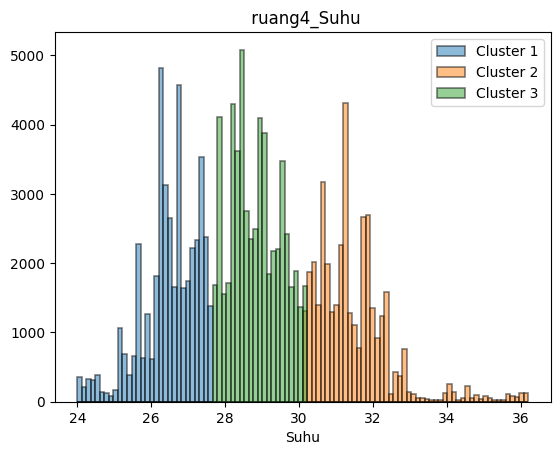

c:\Users\User\anaconda3\envs\DS\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


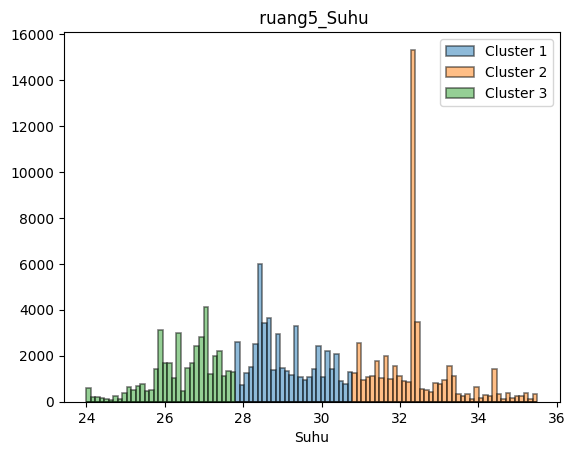

c:\Users\User\anaconda3\envs\DS\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


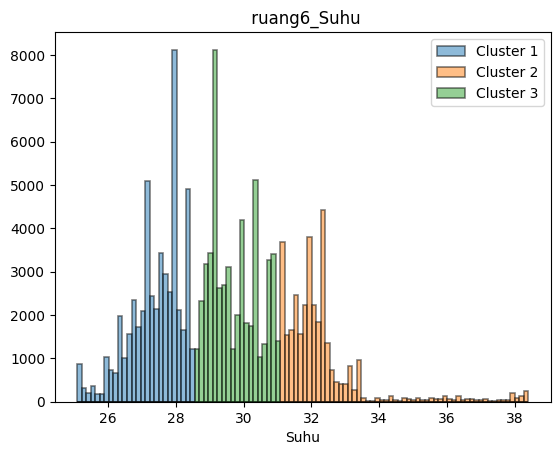

In [161]:
for column in df_clean.columns:
      find_optimum_range_KMEANs(df_clean[column], column, "histogram")

c:\Users\User\anaconda3\envs\DS\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


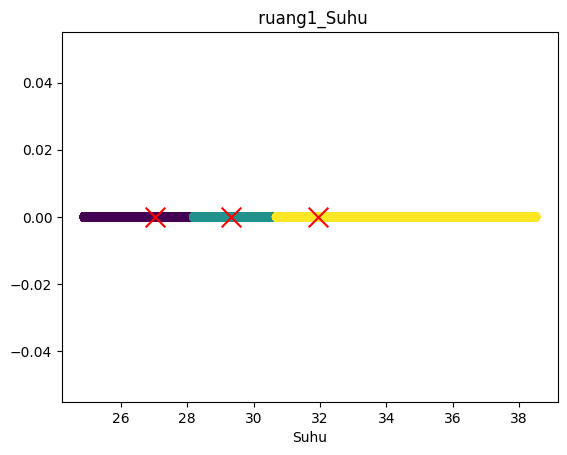

c:\Users\User\anaconda3\envs\DS\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


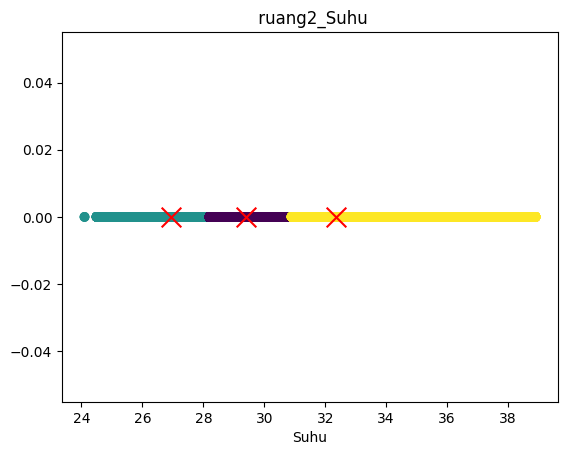

c:\Users\User\anaconda3\envs\DS\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


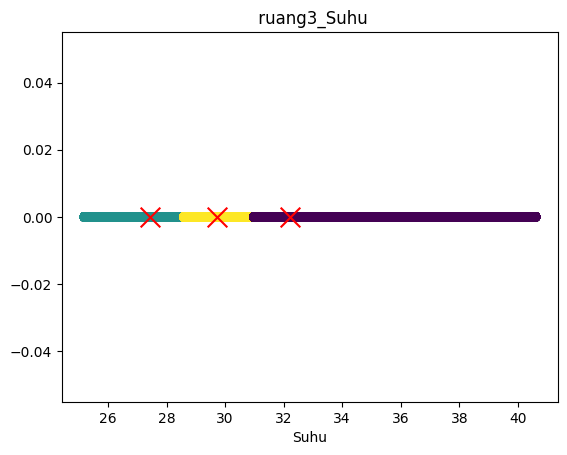

c:\Users\User\anaconda3\envs\DS\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


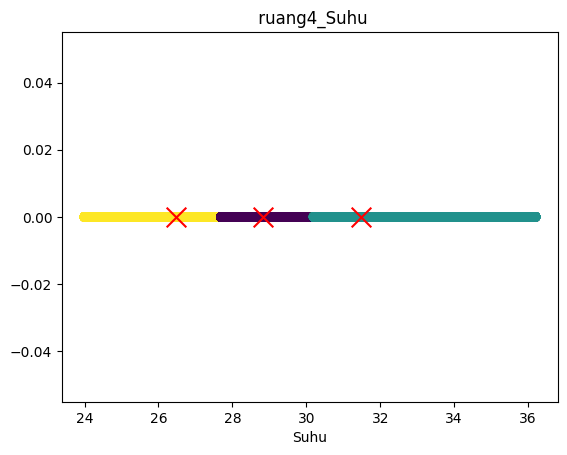

c:\Users\User\anaconda3\envs\DS\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


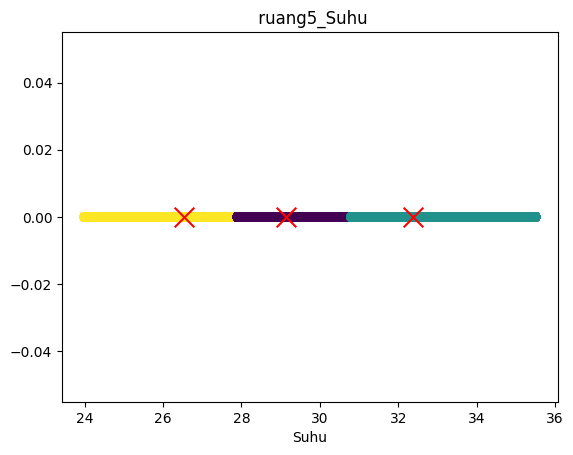

c:\Users\User\anaconda3\envs\DS\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


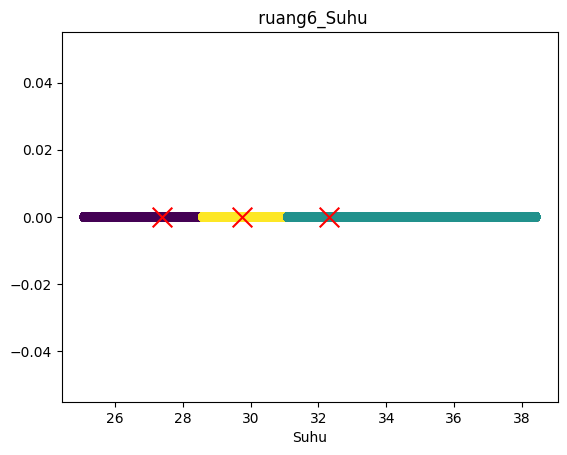

In [162]:
for column in df_clean.columns:
      find_optimum_range_KMEANs(df_clean[column], column, "scatter")